# Universidade Federal de Alagoas - Instituto de Computação
## **3ª lista de exercícios**


---

Alunos: Anderson Clemente, Ester de Lima.

Instruções:
A lista deve ser respondida por grupos de até 2 pessoas (graduação) e individualmente (mestrado).
Resoluções idênticas de grupos distintos serão desconsideradas.
O código e as imagens devem ser anexadas a cada questão.
Data limite para entrega: 17/04/2022.


---



In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import glob

1. Escolha uma das metodologias que você implementou na segunda lista para gerar correspondências entre um par de imagens. Aplique-a em 5 pares de imagens (com sobreposição) para calcular suas homografias, e aplique-as para gerar panoramas entre os pares de imagens (um panorama por par). Obs.: nessa questão, não é permitido usar a API de alto nível Stitcher. Dica: use a função warpPerspective da OpenCV.

In [2]:
def imgPanorama(img1, img2, showMathes=False, printOut = True):
  sift = cv2.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2, k=2)
  matches = [m for m in matches if m[0].distance < 0.5*m[1].distance]
  matches = np.asarray(matches)
  if showMathes:
    out = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches[:50], None, flags=2)
    plt.imshow(out)
    plt.show()
  if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
  else:
      raise AssertionError('Can’t find enough keypoints.')
  dst = cv2.warpPerspective(img1,H,((img1.shape[1] + img2.shape[1]), img2.shape[0]))
  dst[0:img2.shape[0], 0:img2.shape[1]] = img2
  if printOut:
    plt.imshow(dst)
    plt.show()
  return dst

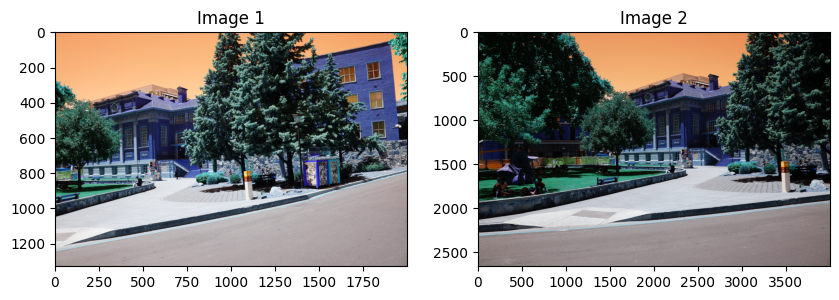

In [3]:
img_1 = cv2.imread('DSC02931.JPG',cv2.COLOR_BGR2GRAY)
img_2 = cv2.imread('DSC02930.JPG',cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_1)
axs[0].set_title('Image 1')
axs[1].imshow(img_2)
axs[1].set_title('Image 2')
plt.show()

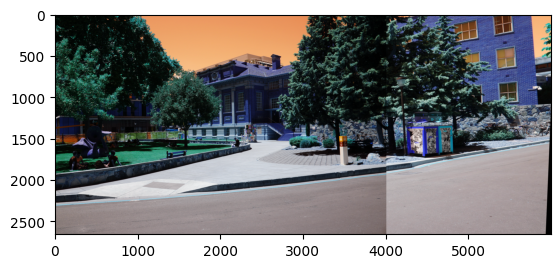

In [4]:
pan1 = imgPanorama(img_1, img_2)

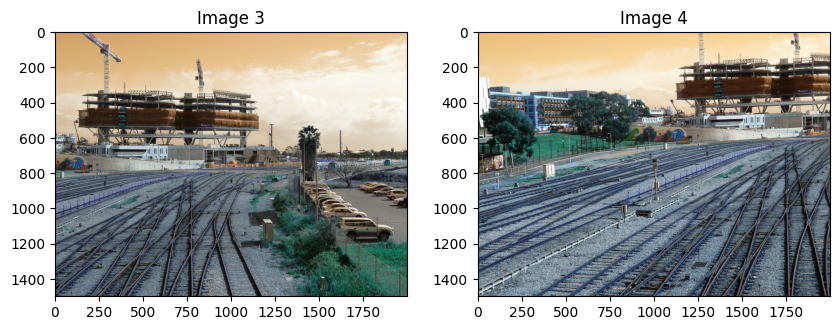

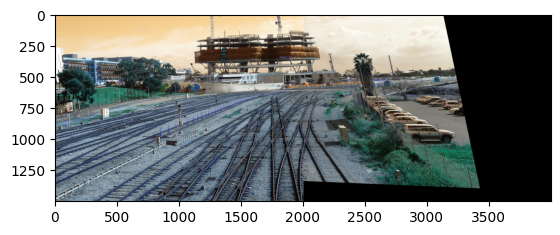

In [5]:
img_3 = cv2.imread('P1010520.JPG',cv2.COLOR_BGR2GRAY)
img_4 = cv2.imread('P1010517.JPG',cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_3)
axs[0].set_title('Image 3')
axs[1].imshow(img_4)
axs[1].set_title('Image 4')
plt.show()

pan2 = imgPanorama(img_3, img_4)

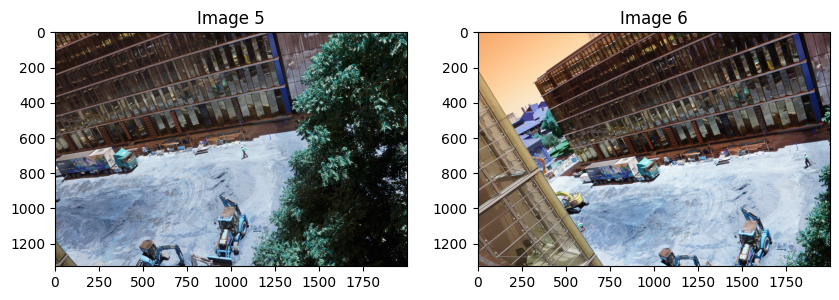

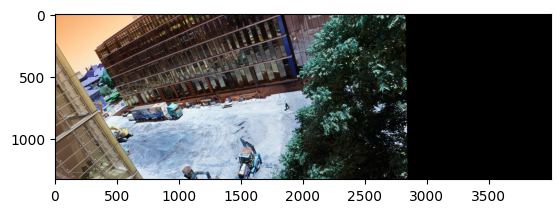

In [6]:
img_5 = cv2.imread('DSC03006.JPG',cv2.COLOR_BGR2GRAY)
img_6 = cv2.imread('DSC03005.JPG',cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_5)
axs[0].set_title('Image 5')
axs[1].imshow(img_6)
axs[1].set_title('Image 6')
plt.show()

pan3 = imgPanorama(img_5, img_6)

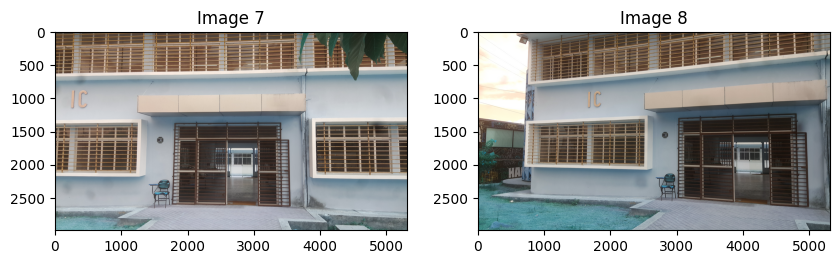

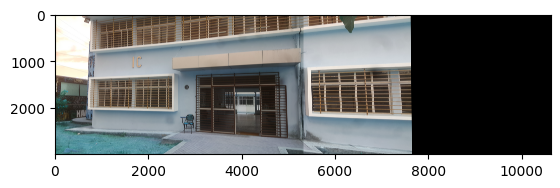

In [7]:
img_7 = cv2.imread('ic3.jpg',cv2.COLOR_BGR2GRAY)
img_8 = cv2.imread('ic2.jpg',cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_7)
axs[0].set_title('Image 7')
axs[1].imshow(img_8)
axs[1].set_title('Image 8')
plt.show()

pan4 = imgPanorama(img_7, img_8)

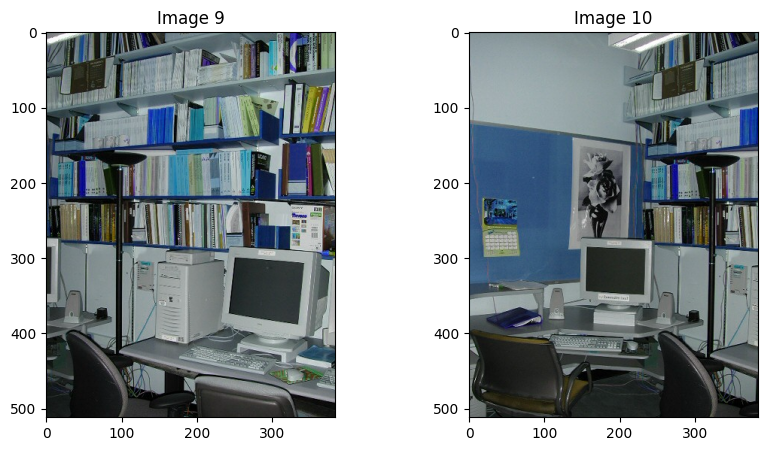

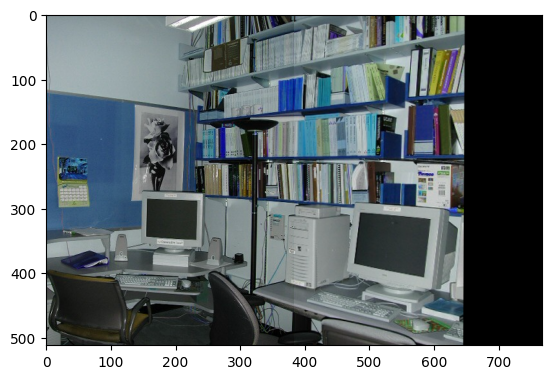

In [8]:
img_9 = cv2.imread('grail04.jpg',cv2.COLOR_BGR2GRAY)
img_10 = cv2.imread('grail05.jpg',cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_9)
axs[0].set_title('Image 9')
axs[1].imshow(img_10)
axs[1].set_title('Image 10')
plt.show()

pan5 = imgPanorama(img_9, img_10)

2. Repita a questão anterior com 5 trios de imagens (com sobreposição
2 a 2), alinhando as imagens no plano da primeira imagem. Repita o mesmo alinhando no plano da segunda imagem, e da terceira imagem. Note que aqui
será necessário compor as transformações de homografia em alguns casos, ou
calcular inversas.

3. Use homografias para trocar as bandeiras dos países na imagem abaixo (e em anexo no classroom) por outras bandeiras. Preencha também a placa de publicidade onde há o nome "London 2012" por outra imagem de publicidade de sua escolha.
Dica: leia [este tutorial](https://medium.com/acmvit/how-to-project-an-image-in-perspective-view-of-a-background-image-opencv-python-d101bdf966bc).

In [9]:
countries = {
    'uk': {
        'positions': [[794, 159], [917, 160], [814, 202], [937, 201]],
        'positions2': [[794, 159], [917, 160], [937, 201], [814, 202]]
    },
    'jp1': {
        'positions': [[819, 218], [953, 218], [843, 265], [977, 265]],
        'positions2': [[819, 218], [953, 218], [977, 265], [843, 265]]
    },
    'us1': {
        'positions': [[848, 276], [994, 279], [872, 331], [1020, 327]],
        'positions2': [[848, 276], [994, 279], [1020, 327], [872, 331]]
    },
    'us2': {
        'positions': [[882, 348], [1031, 345], [908, 407], [1062, 403]],
        'positions2': [[882, 348], [1031, 345], [1062, 403], [908, 407]]
    },
    'hun': {
        'positions': [[917, 427], [1073, 423], [949, 494], [1113, 492]],
        'positions2': [[917, 427], [1073, 423], [1113, 492], [949, 494]]
    },
    'br': {
        'positions': [[960, 511], [1127, 510], [1003, 592], [1174, 588]],
        'positions2': [[960, 511], [1127, 510], [1174, 588], [1003, 592]]
    },
    'jp2': {
        'positions': [[1007, 616], [1188, 609], [1047, 700], [1236, 698]],
        'positions2': [[1007, 616], [1188, 609], [1236, 698], [1047, 700]]
    },
    'ger': {
        'positions': [[1065, 726], [1255, 721], [1093, 792], [1294, 791]],
        'positions2': [[1065, 726], [1255, 721], [1294, 791], [1093, 792]]
    }
}

ad ={
    'positions': [[273, 39], [275, 88], [1351, 34], [1352, 79]],
    'positions2': [[273, 39], [275, 88], [1352, 79], [1351, 34]]
}

pool = cv2.imread('piscina.jpg')
new_ad = cv2.imread('whale.jpg')
flag1 = cv2.imread('flag1.png')
flag2 = cv2.imread('flag2.png')
flag3 = cv2.imread('flag3.jpg')
flag4 = cv2.imread('flag4.jpg')
flag5 = cv2.imread('flag5.jpg')
flag6 = cv2.imread('flag6.png')
flag7 = cv2.imread('flag7.jpg')
flag8 = cv2.imread('hiddenleaf.jpg')
flags = [flag1, flag2, flag3, flag4, flag5, flag6, flag7, flag8]

In [10]:
height, width = pool.shape[:2]
h1,w1 = flag1.shape[:2]
pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
pts2=np.float32(countries['uk']['positions'])
h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)
height, width, channels = pool.shape
im1Reg = cv2.warpPerspective(flag1, h, (width, height))
mask2 = np.zeros(pool.shape, dtype=np.uint8)
roi_corners2 = np.int32(countries['uk']['positions2'])
channel_count2 = pool.shape[2]  
ignore_mask_color2 = (255,)*channel_count2
cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)
mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(pool, mask2)
final = cv2.bitwise_or(im1Reg, masked_image2)

In [11]:
for index, (country, flag) in enumerate(zip(list(countries.keys())[1:], flags[1:])):
    height, width = final.shape[:2]
    h1,w1 = flag.shape[:2]
    pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
    pts2=np.float32(countries[country]['positions'])
    h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)
    height, width, channels = pool.shape
    im1Reg = cv2.warpPerspective(flag, h, (width, height))
    mask2 = np.zeros(final.shape, dtype=np.uint8)
    roi_corners2 = np.int32(countries[country]['positions2'])
    channel_count2 = final.shape[2]  
    ignore_mask_color2 = (255,)*channel_count2
    cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)
    mask2 = cv2.bitwise_not(mask2)
    masked_image2 = cv2.bitwise_and(final, mask2)
    final = cv2.bitwise_or(im1Reg, masked_image2)

In [12]:
height, width = final.shape[:2]
h1,w1 = new_ad.shape[:2]
pts1=np.float32([[0,0],[w1,0],[0,h1],[w1,h1]])
pts2=np.float32(ad['positions'])
h, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)
height, width, channels = final.shape
im1Reg = cv2.warpPerspective(new_ad, h, (width, height))
mask2 = np.zeros(final.shape, dtype=np.uint8)
roi_corners2 = np.int32(ad['positions2'])
channel_count2 = final.shape[2]  
ignore_mask_color2 = (255,)*channel_count2
cv2.fillConvexPoly(mask2, roi_corners2, ignore_mask_color2)
mask2 = cv2.bitwise_not(mask2)
masked_image2 = cv2.bitwise_and(final, mask2)
final = cv2.bitwise_or(im1Reg, masked_image2)

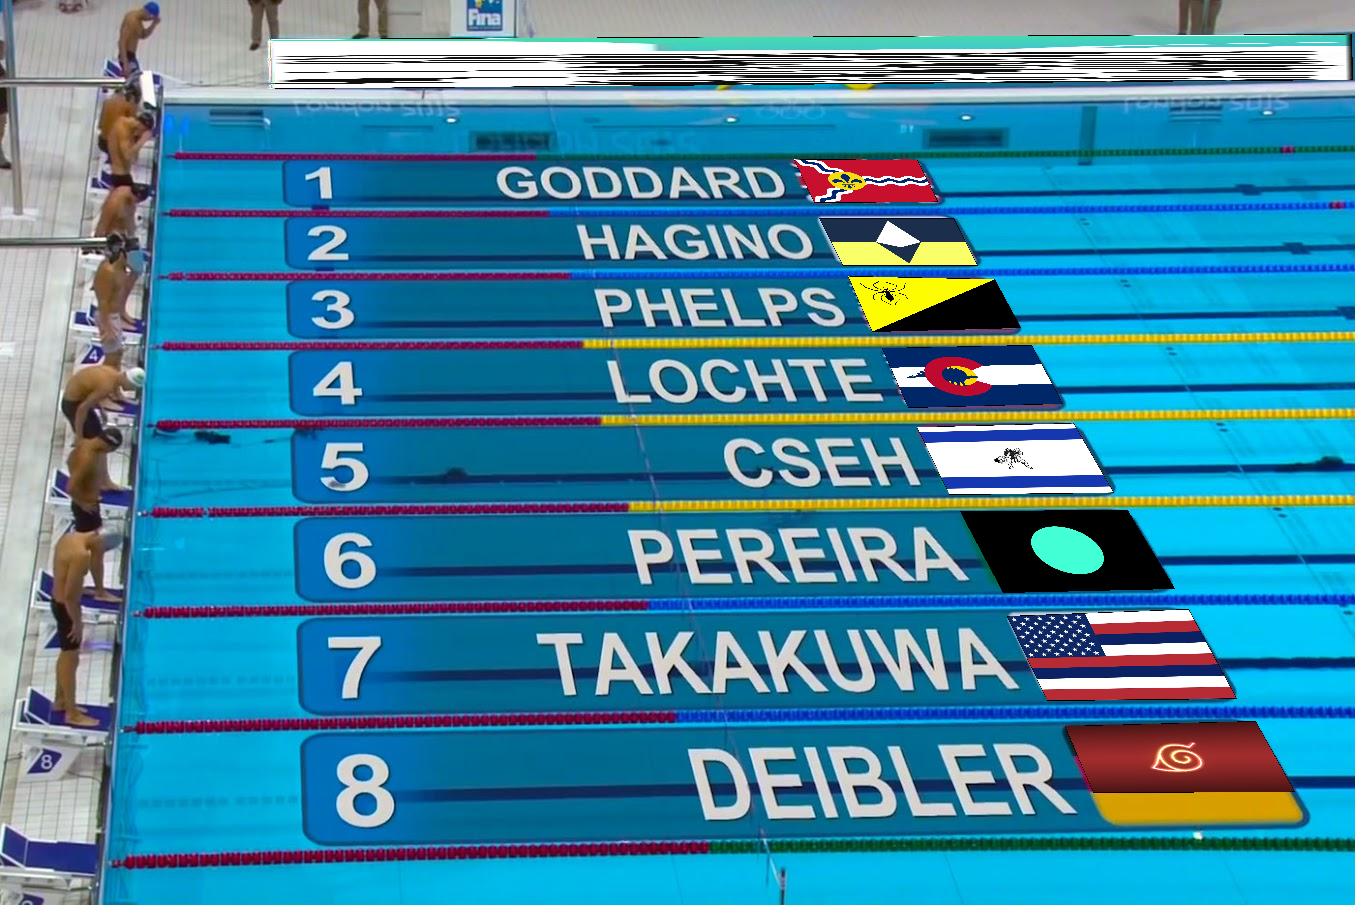

In [13]:
cv2_imshow(final)

4. Leia o seguinte tutorial de calibração de câmera: https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html
Você vai precisar de um tabuleiro de xadrez (pode imprimir numa folha A4, e colar num papelão ou emplastificar para a geometria ficar fixa). Meça as dimensões do seu tabuleiro para calibrar a câmera, considerando que o tabuleiro sempre está no plano z = 0, e que o canto inferior esquerdo do tabuleiro é a origem (0, 0, 0). Após calibrar a câmera, determine a projeção do ponto (2W, 2H, 0) na imagem (tente posicionar o xadrez de modo que este ponto projetado ainda apareça na imagem). Pinte este pixel projetado de vermelho. Repita isso 3 vezes, variando o ponto de vista.

In [14]:
# CHESSBOARD = (8, 8)

# # termination criteria
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((1, CHESSBOARD[0] * CHESSBOARD[1], 3), np.float32)
# objp[0,:,:2] = np.mgrid[0:CHESSBOARD[0], 0:CHESSBOARD[1]].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.

# images = glob.glob('*.jpg')

# for filename in images:
#   image = cv2.imread(filename)
#   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   # Find the chess board corners
#   ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
#   print(ret, corners)
#   if ret == True:
#     objpoints.append(objp)
#     corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
#     imgpoints.append(corners2)
#     image = cv2.drawChessboardCorners(image, CHESSBOARD, corners2, ret)
#   # cv2_imshow(image)

In [15]:
# h, w = image.shape[:2]
# # ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
# print(len(objpoints))
# print(len(imgpoints))